## 1. Import Pre-Requisites

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## 2. Load Data

In [3]:
insurance_DF = pd.read_csv("insurance.csv")
insurance_DF.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

## 3. Information about Data

* **age**: age of primary beneficiary
* **sex**: insurance contractor gender (*female, male*)
* **bmi**: Body mass index, providing an understanding of body weights that are relatively high or low relative to height, objective index of body weight (kg/m^2)
using the ratio of height to weight, ideally 18.5 to 24.9
* **children**: Number of children covered by health insurance / Number of dependents
* **smoker**: Smoking (*yes, no*)
* **region**: the beneficiary's residential area in the US (*northeast, southeast, southwest, northwest*)
* **charges**: Individual medical costs billed by health insurance.

size of the dataframe : 

In [4]:
insurance_DF.shape

(1338, 7)

* Row count : 1338
* column count : 7

data types and other details regarding data :

In [5]:
insurance_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## 4. Exploring data

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

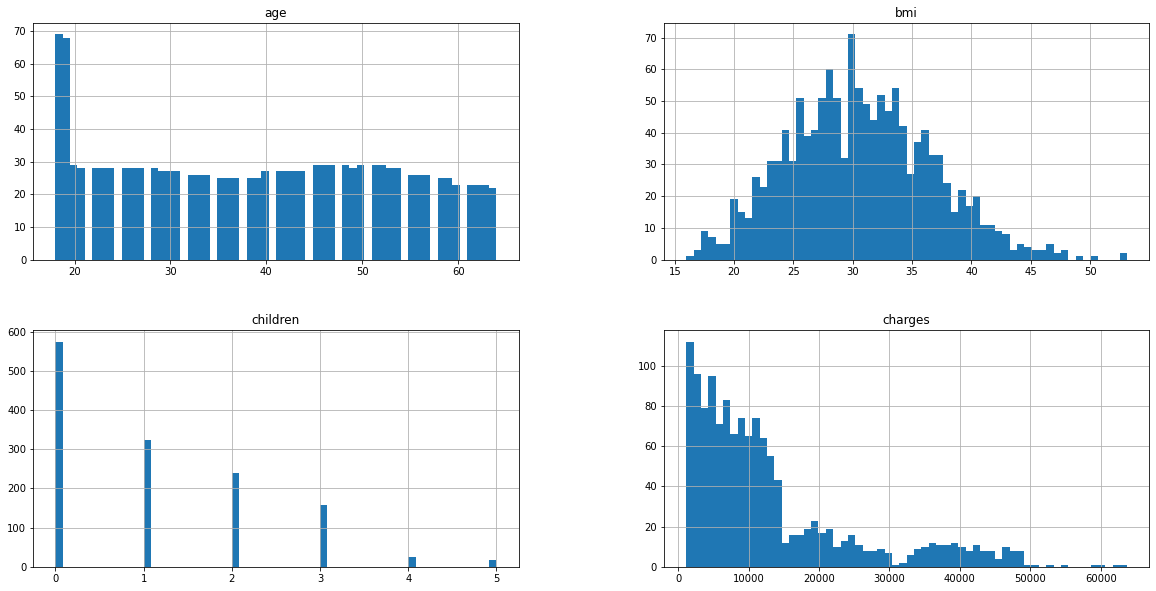

In [6]:
insurance_DF.hist(bins=60, figsize=(20, 10))

Representing non categorical data in the form of histogram. Shows the distribution of data across different features in the dataframe.

In [7]:
insurance_DF.describe().transpose()

count          mean           std        min         25%       50%  \
age       1338.0     39.207025     14.049960    18.0000    27.00000    39.000   
bmi       1338.0     30.663397      6.098187    15.9600    26.29625    30.400   
children  1338.0      1.094918      1.205493     0.0000     0.00000     1.000   
charges   1338.0  13270.422265  12110.011237  1121.8739  4740.28715  9382.033   

                   75%          max  
age          51.000000     64.00000  
bmi          34.693750     53.13000  
children      2.000000      5.00000  
charges   16639.912515  63770.42801

This table shows insights to (Numeric Values):
* The min and max insurance values (charges). 
* The age of people availed for insurance 9age).
* bmi of every people (bmi)
* number of children (if any)

In [51]:
categorical = insurance_DF.dtypes[insurance_DF.dtypes == "object"].index
print(type(list(categorical)), list(categorical))

insurance_DF[categorical].describe().transpose()

<class 'list'> ['sex', 'smoker', 'region']


count unique        top  freq
sex     1329      2       male   670
smoker  1329      2         no  1058
region  1329      4  southeast   357

categorical columns are : *sex, smoker, region*

In [9]:
sex_description = pd.Categorical(insurance_DF['sex'])
sex_description.describe()

counts     freqs
categories                  
female         662  0.494768
male           676  0.505232

Sex description ::

**inference** : *distribution of both genders are almost same with 50%*

In [10]:
smoker_description = pd.Categorical(insurance_DF['smoker'])
smoker_description.describe()

counts     freqs
categories                  
no            1064  0.795217
yes            274  0.204783

smoker description ::

**inference** : *distribution of non smokers is thrice more than that of smokers*

In [11]:
region_description = pd.Categorical(insurance_DF['region'])
region_description.describe()

counts     freqs
categories                  
northeast      324  0.242152
northwest      325  0.242900
southeast      364  0.272048
southwest      325  0.242900

region description ::

**inference** : *distribution of people across different regions is quite similar with 25 % across all the regions*

## 5. Finding / Removing outliers

Since **bmi**,  **age** and **children** has values below or around 60 we can try plotting them in a single boxplot to check if any outliers exist.

<AxesSubplot:>

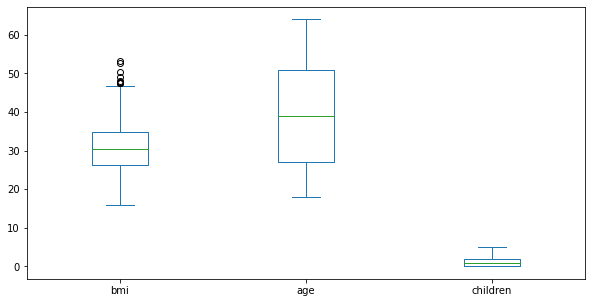

In [12]:
insurance_DF[['bmi', 'age', 'children']].plot(kind='box', figsize=(10, 5))

The boxplot shows that bmi has outliers. Lets see how many rows would be affected and the decision to drop / impute data can be taken accordingly.

In [13]:
Q1 = insurance_DF['bmi'].quantile(0.25)
Q3 = insurance_DF['bmi'].quantile(0.75)
quartile_range = Q3 - Q1

filter = (insurance_DF['bmi'] >= Q1 - 1.5 * quartile_range) & (insurance_DF['bmi'] <= Q3 + 1.5 * quartile_range)
(insurance_DF.loc[filter].shape, insurance_DF.shape)

((1329, 7), (1338, 7))

So from the quantile count only 9 rows will be affected and so we can simply remove in this case, since it wont include more than 1%.

In [14]:
insurance_DF = insurance_DF.loc[filter]
insurance_DF.shape

(1329, 7)

<AxesSubplot:>

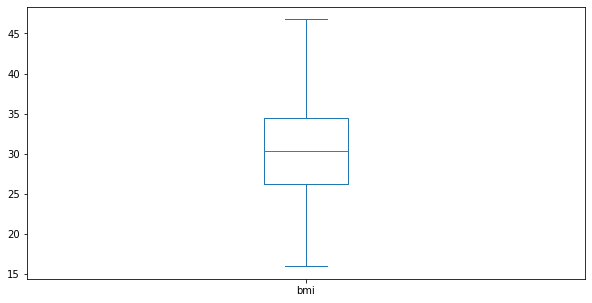

In [15]:
insurance_DF['bmi'].plot(kind='box', figsize=(10, 5))

Now that outliers of bmi is taken out. Lets see the outliers for **charges**.

<AxesSubplot:>

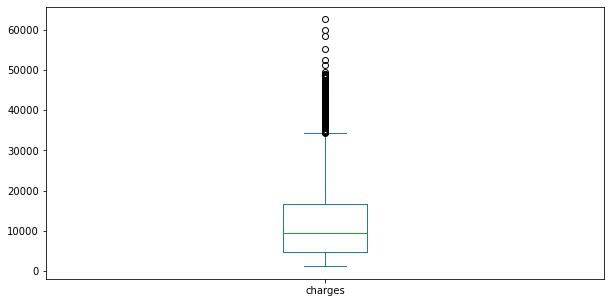

In [16]:
insurance_DF['charges'].plot(kind='box', figsize=(10, 5))

In [17]:
median_charges = insurance_DF['charges'].median()

Q1 = insurance_DF['charges'].quantile(0.25)
Q3 = insurance_DF['charges'].quantile(0.75)
quartile_range = Q3 - Q1

filter = (insurance_DF['charges'] <= Q1 - 1.5 * quartile_range) |(insurance_DF['charges'] >= Q3 + 1.5 * quartile_range)
print(insurance_DF.loc[filter].shape, insurance_DF.shape)

insurance_DF.loc[filter, 'charges'] = median_charges

(138, 7) (1329, 7)


Since 138 rows will be affected, we cant simply drop all the rows. So we will be trying to impute rows with median of **charges** so that it wouldnt affect the data negatively at the same time, would help to retain 138 rows.

<AxesSubplot:>

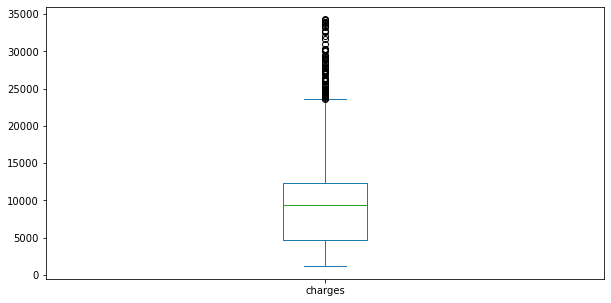

In [18]:
insurance_DF['charges'].plot(kind='box', figsize=(10, 5))

There still exist rows which are out of bound. But for now we can leave it as it is, or the data will be conpletely flaw.

## 6. Finding Relations

In [19]:
categorical_DF = insurance_DF.copy()

for col_name in categorical_DF.columns:
    if(categorical_DF[col_name].dtype == 'object'):
        categorical_DF.loc[:, col_name]= categorical_DF[col_name].astype('category')
        categorical_DF.loc[:, col_name] = categorical_DF[col_name].cat.codes

categorical_DF.head()

age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520

In [ ]:
corr_matrix = categorical_DF.corr().abs()
corr_matrix

<AxesSubplot:>

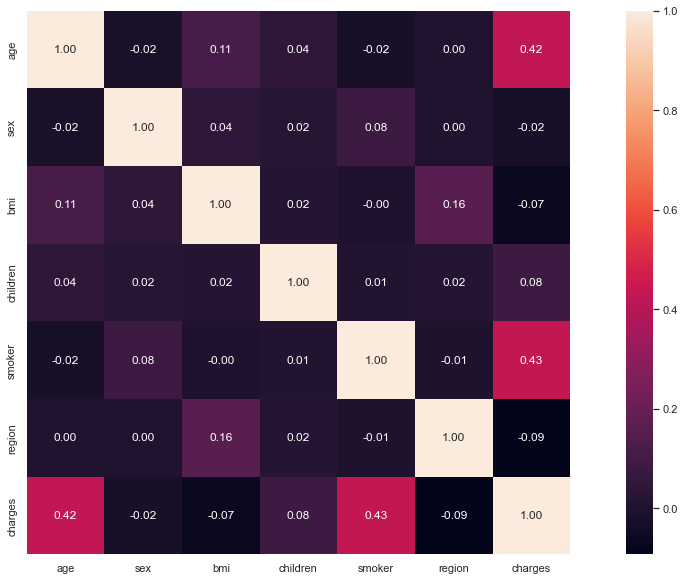

In [20]:
sns.set(rc = {'figure.figsize':(20, 10)})
sns.heatmap(categorical_DF.corr(),square=True, annot=True, fmt='.2f')

**Inference** :: 
* This heatmap shows that ***sex***, ***bmi*** and ***region*** has negative impact towards charges. Moreover region can be neglected / dropped, since it hasnt have anything to do with the insurance of a person.

* ***Smoker*** and ***age*** has direct impact on charges

Now lets see the relation between charges against to get better understanding of smoker and / or age impact on insurance

<AxesSubplot:xlabel='smoker', ylabel='charges'>

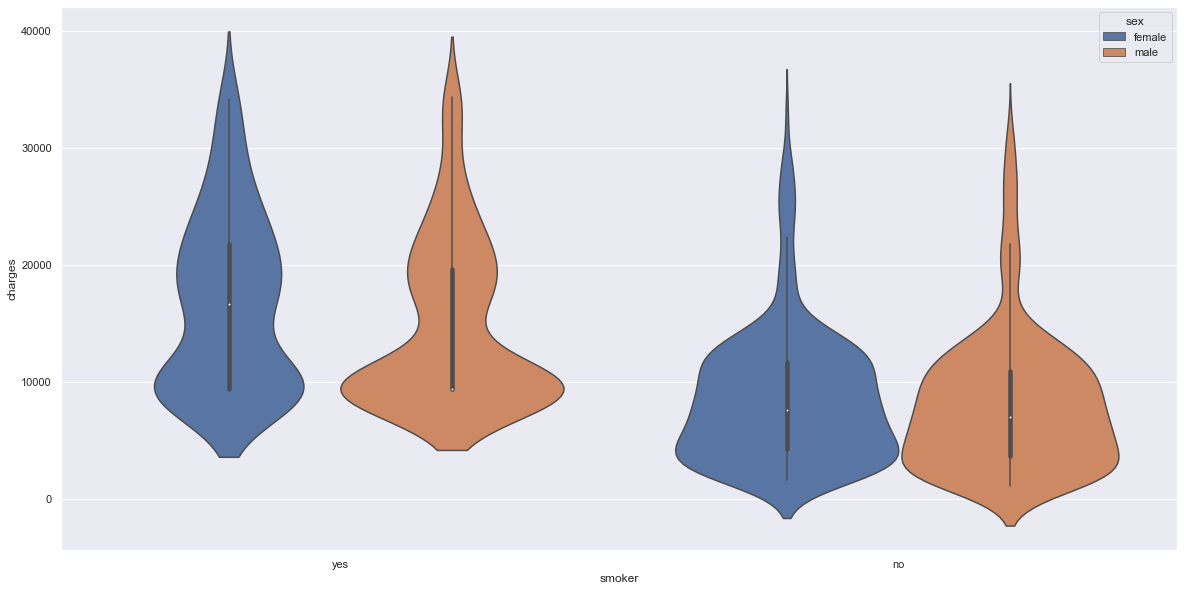

In [21]:
sns.violinplot(data=insurance_DF, x='smoker', y='charges', hue='sex')

<AxesSubplot:xlabel='age', ylabel='charges'>

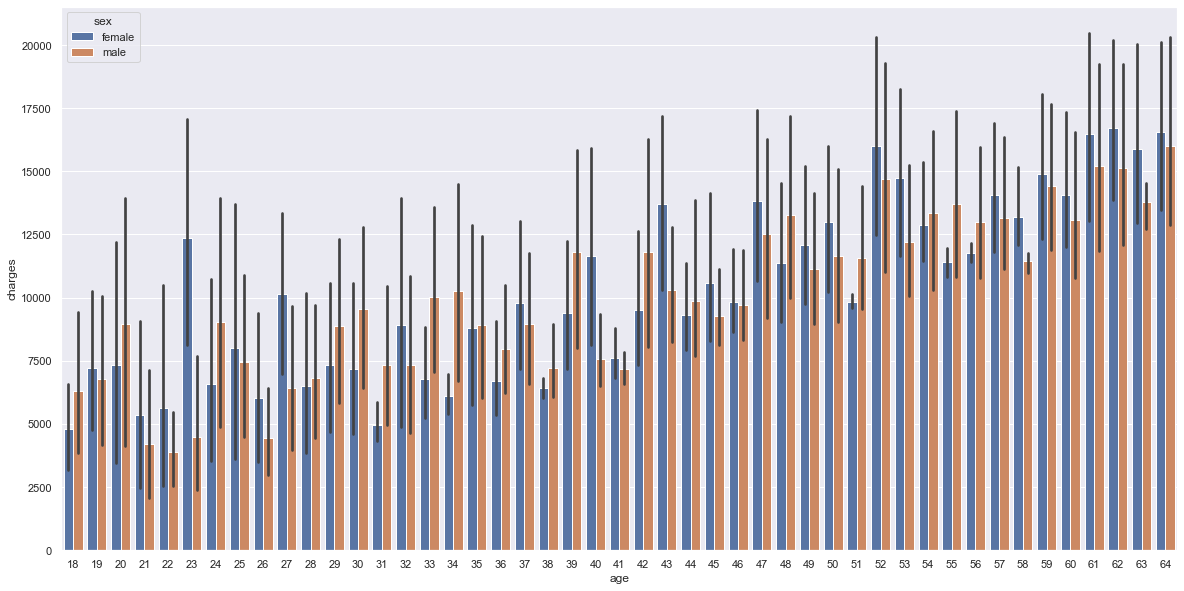

In [22]:
sns.barplot(data=insurance_DF, x='age', y='charges', hue='sex')

## 7. Cleaning Data

In [23]:
insurance_DF.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No rows have nan values. So no need to impute data.

In [24]:
insurance_DF.drop_duplicates
insurance_DF.shape

(1329, 7)

No duplicate rows since number of rows remains same.

## 8. Preparing Data

In [25]:
sex_dummy = pd.get_dummies(insurance_DF['sex'])
smoker_dummy = pd.get_dummies(insurance_DF['smoker'])

insurance_prepared_DF = pd.concat([insurance_DF, sex_dummy['male']], axis=1)
insurance_prepared_DF = pd.concat([insurance_prepared_DF, smoker_dummy['yes']], axis=1)

insurance_prepared_DF.rename(columns={'male': 'is_male', 'yes': 'is_smoker'}, inplace=True)
insurance_prepared_DF.drop(['sex', 'smoker', 'region'], axis=1, inplace=True)
insurance_prepared_DF.head()

age     bmi  children      charges  is_male  is_smoker
0   19  27.900         0  16884.92400        0          1
1   18  33.770         1   1725.55230        1          0
2   28  33.000         3   4449.46200        1          0
3   33  22.705         0  21984.47061        1          0
4   32  28.880         0   3866.85520        1          0

## 9. Business Insights

<AxesSubplot:xlabel='smoker'>

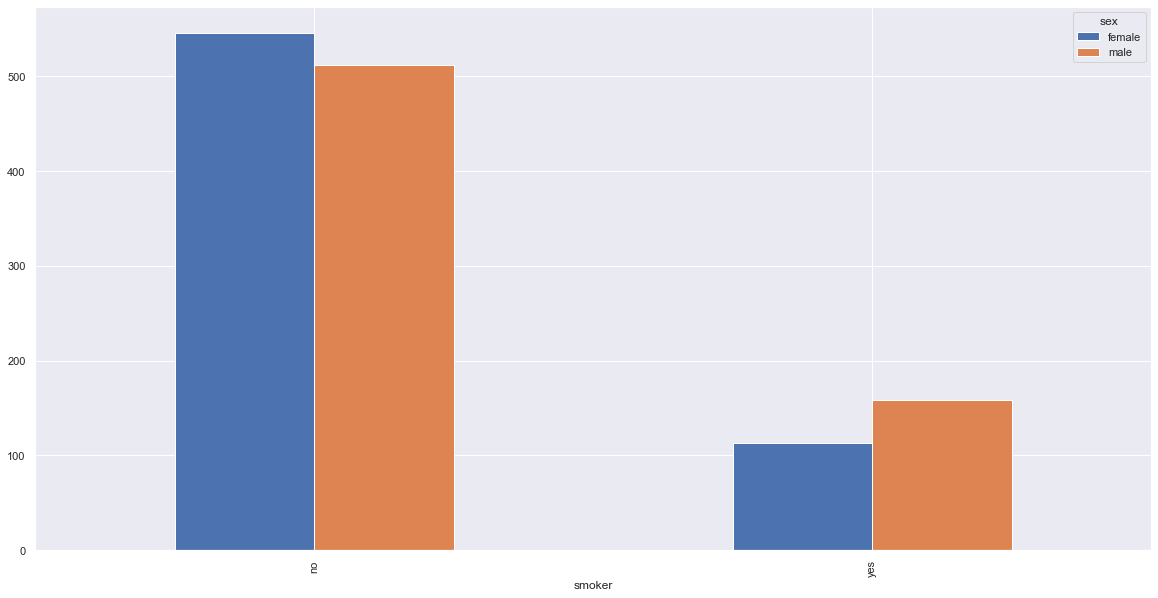

In [26]:
insurance_DF.groupby(['smoker'])['sex'].value_counts().unstack().plot(kind='bar')

**Q1**: Is the proportion of smokers significantly different in different genders?

**Ans**: From the above graph, its clear that proportion of both gender in smokers and non smokers seems to be of the same count with :
* around 520 males and females constitute to total amount of smokers
* around  130 males and females constitute to total amount of no smokers

```
insurance_DF.groupby(['smoker'])['sex'].value_counts()
```

**INFERENCE : PROPORTION OF SMOKERS IS NOT SIGNIFICATNTLY DIFFERENT IN DIFFERENT SEX**

In [27]:
x = np.array(insurance_DF.loc[insurance_DF.sex == 'male', 'bmi'])
y = np.array(insurance_DF.loc[insurance_DF.sex == 'female', 'bmi'])

print(f'Median of BMI of male : {np.median(x)} \n Median of BMI of female : {np.median(y)}')
print(f'Mean of BMI of male : {np.mean(x)} \n Mean of BMI of female : {np.mean(y)}')
print(f'Min of BMI of male : {np.min(x)} \n Min of BMI of female : {np.min(y)}')
print(f'Max of BMI of male : {np.max(x)} \n Max of BMI of female : {np.max(y)}')

Median of BMI of male : 30.59 
 Median of BMI of female : 30.02
Mean of BMI of male : 30.771858208955223 
 Mean of BMI of female : 30.298922610015172
Min of BMI of male : 15.96 
 Min of BMI of female : 16.815
Max of BMI of male : 46.53 
 Max of BMI of female : 46.75


**Q2**: Does bmi of males differ significantly from that of females?

**Ans**: From the above calculation, it is clear that both the median and mean of bmi both the genders are almost identical and so ..

**INFERENCE : SEX HAVE NO SIGNIFICANCE ON BMI**

<AxesSubplot:xlabel='smoker', ylabel='charges'>

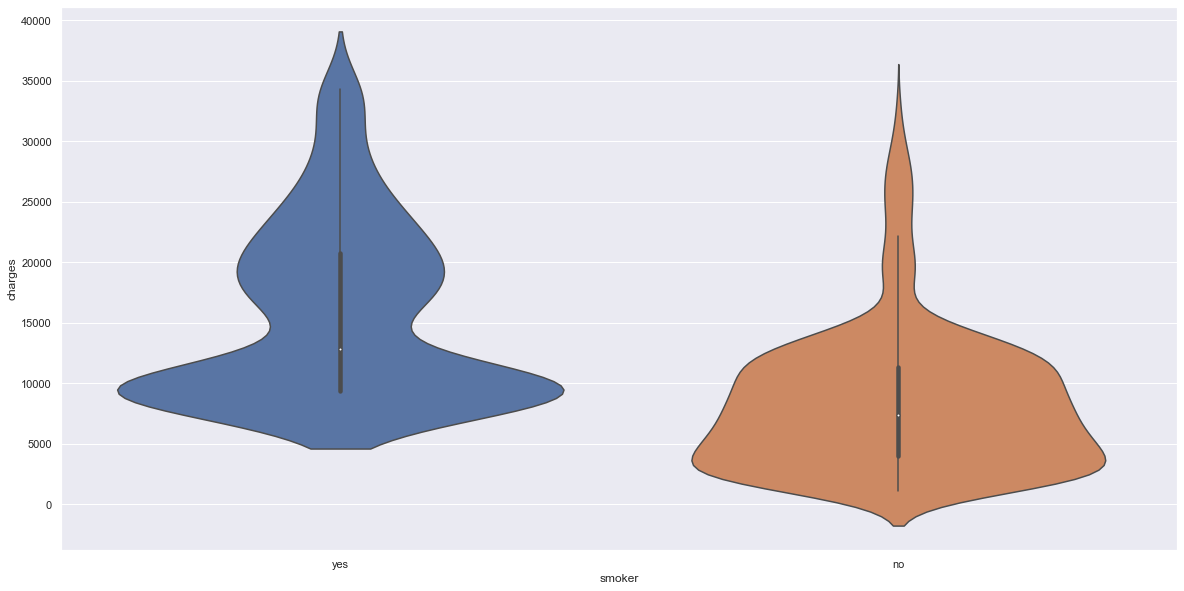

In [28]:
sns.violinplot(data=insurance_DF, x='smoker', y='charges')

**Q3**: Do charges of people who smoke differ significantly from the people who don't?

**Ans**: From the above graph it is evident that there is a significant difference in insurance availed by smokers > non smokers.

**INFERENCE : SMOKING HAS SIGNIFICANT DIFFFERENCE IN CHARGES**

<AxesSubplot:xlabel='children', ylabel='bmi'>

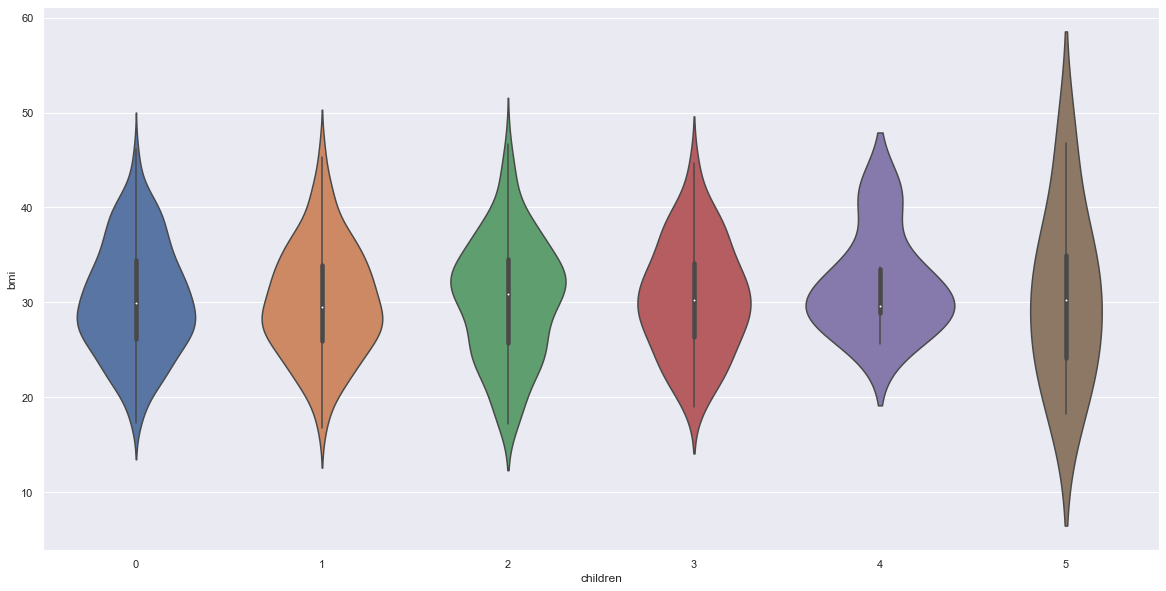

In [29]:
sns.violinplot(data=insurance_DF[insurance_DF['sex'] == 'female'], x='children', y='bmi')

**Q4**: Is the distribution of bmi across women with no children, one child and two children, the same ?

**Ans**: 
* BMI is distributed significantly similar in Women with 0, 1, 2, and 3 children with BMI 12 - 50
* While Women with 4 children has comparatively bmi of around 30.
* Also Wmone with 5 children has highly distributed type of BMI from >10 to <50

# 10. Train-Test Split 

In [30]:
insurance_prepared_DF.head()

age     bmi  children      charges  is_male  is_smoker
0   19  27.900         0  16884.92400        0          1
1   18  33.770         1   1725.55230        1          0
2   28  33.000         3   4449.46200        1          0
3   33  22.705         0  21984.47061        1          0
4   32  28.880         0   3866.85520        1          0

In [31]:
y = insurance_prepared_DF['charges']
X = insurance_prepared_DF.drop('charges', axis=1)
(y.shape, X.shape)

((1329,), (1329, 5))

In [32]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.head()

0         1    2    3    4
0  0.021739  0.387788  0.0  0.0  1.0
1  0.000000  0.578435  0.2  1.0  0.0
2  0.217391  0.553426  0.6  1.0  0.0
3  0.326087  0.219065  0.0  1.0  0.0
4  0.304348  0.419617  0.0  1.0  0.0

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=25)
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((930, 5), (399, 5), (930,), (399,))

# 11.ML Models

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

In [35]:
# Linear Regressor
linear_regreassion_model = LinearRegression().fit(X_train, y_train)
(
    f"Model: {LinearRegression}",
    f"value of constant c: {linear_regreassion_model.intercept_}",
    f"value of slopes for all features: {linear_regreassion_model.coef_}",
    f"train data score: {linear_regreassion_model.score(X_train, y_train)}",
    f"test data score: {linear_regreassion_model.score(X_test, y_test)}",
)

("Model: <class 'sklearn.linear_model._base.LinearRegression'>",
 'value of constant c: 5408.367824975495',
 'value of slopes for all features: [10163.05957803 -3945.04479121  1951.8897245   -604.69971544\n  7477.30295138]',
 'train data score: 0.38432103113119576',
 'test data score: 0.41363995235465245')

In [36]:
param_grid = {
    "min_samples_split": [5, 10, 20, 40],
    "max_depth": [2, 4, 6, 8],
    "min_samples_leaf": [20, 40, 100],
    "max_leaf_nodes": [5,10, 20, 100],
}

grid_cv_dtm = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
grid_cv_dtm.fit(X_train, y_train)
(
  f"Best score: {grid_cv_dtm.best_score_}",
  f"Best Hyperparameters: {grid_cv_dtm.best_params_}",
)

('Best score: 0.5044855928507963',
 "Best Hyperparameters: {'max_depth': 8, 'max_leaf_nodes': 20, 'min_samples_leaf': 20, 'min_samples_split': 10}")

In [37]:
# Decision Tree Regressor
decision_tree_model = DecisionTreeRegressor(
    max_depth=8,
    min_samples_split=20,
    max_leaf_nodes=20,
    min_samples_leaf=10,
)
decision_tree_model.fit(X_train, y_train)
(
    f"Model: {decision_tree_model}",
    f"train data score: {decision_tree_model.score(X_train, y_train)}",
    f"test data score: {decision_tree_model.score(X_test, y_test)}",
)

('Model: DecisionTreeRegressor(max_depth=8, max_leaf_nodes=20, min_samples_leaf=10,\n                      min_samples_split=20)',
 'train data score: 0.6043127347694046',
 'test data score: 0.5859413054396061')

In [38]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}
 
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)
(
  f"Best score: {grid.best_score_}",
  f"Best Hyperparameters: {grid.best_params_}",
)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.001 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.015 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.001 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.028 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.033 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.000 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.015 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.002 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.029 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.034 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.000 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

('Best score: 0.4106741244969623',
 "Best Hyperparameters: {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}")

In [39]:
# Support Vector Regressor
support_vector_regressor = SVR(
    C=1000,
    gamma=1,
    kernel="rbf",
)
support_vector_regressor.fit(X_train, y_train)
(
  f"Model: {support_vector_regressor}",
  f"train data score: {support_vector_regressor.score(X_train, y_train)}",
  f"test data score: {support_vector_regressor.score(X_test, y_test)}",
)

('Model: SVR(C=1000, gamma=1)',
 'train data score: 0.4321531033408528',
 'test data score: 0.4320799618557365')

In [40]:
param_grid = {
    'alpha': [0, 0.00001, 0.0001, 0.001, 0.01, 0.1],
}
grid = GridSearchCV(linear_model.Lasso(), param_grid=param_grid)
grid.fit(X_train, y_train)
(
  f"Best score: {grid.best_score_}",
  f"Best alpha: {grid.best_estimator_.alpha}",
)

C:\Users\jose.atlin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jose.atlin\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\jose.atlin\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10956109710.38348, tolerance: 3497215.064731366
  model = cd_fast.enet_coordinate_descent(
C:\Users\jose.atlin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearR

('Best score: 0.37706125087001696', 'Best alpha: 0.1')

In [41]:
# Lasso Regressor
lasso_regressor = linear_model.Lasso(alpha=0.1)
lasso_regressor.fit(X_train, y_train)
(
  f"Model: {lasso_regressor}",
  f"train data score: {lasso_regressor.score(X_train, y_train)}",
  f"test data score: {lasso_regressor.score(X_test, y_test)}",
)

('Model: Lasso(alpha=0.1)',
 'train data score: 0.3843210161322479',
 'test data score: 0.41364242628450065')

In [42]:
# Best Hyper-parameters for RFR
param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 10, None],
    'max_features': ['auto', 'log2'],
    'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]
}
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=param_grid,
    cv=5,
    n_jobs=1,
    verbose=0,
    return_train_score=True
)
grid_search.fit(X_train, y_train)
(
  f"Best score: {grid_search.best_score_}",
  f"Best Hyperparameters: {grid_search.best_params_}",
)

('Best score: 0.5400218835837423',
 "Best Hyperparameters: {'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 13}")

In [43]:
# Random Forest Regressor
random_forest_regressor = RandomForestRegressor(
    bootstrap=True,
    max_depth=5,
    max_features='auto',
    n_estimators=13,
)
random_forest_regressor.fit(X_train, y_train)
(
  f"Model: {random_forest_regressor}",
  f"train data score: {random_forest_regressor.score(X_train, y_train)}",
  f"test data score: {random_forest_regressor.score(X_test, y_test)}",
)

('Model: RandomForestRegressor(max_depth=5, n_estimators=13)',
 'train data score: 0.6567867660608048',
 'test data score: 0.5823072462354619')

# 12.Conclusion

In [44]:
# prediction using decision_tree_model
y_pred = decision_tree_model.predict(X_test)

predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions_df.head(10)

Actual     Predicted
1301   9361.32680   9361.326800
639   12949.15540  12472.860411
624   12129.61415  12472.860411
77     1532.46970   2528.251118
721   11264.54100  12472.860411
1255   6474.01300   7125.086576
1123  18903.49141   5180.514304
554   17878.90068   5180.514304
555    3847.67400   5180.514304
819    9361.32680   9361.326800

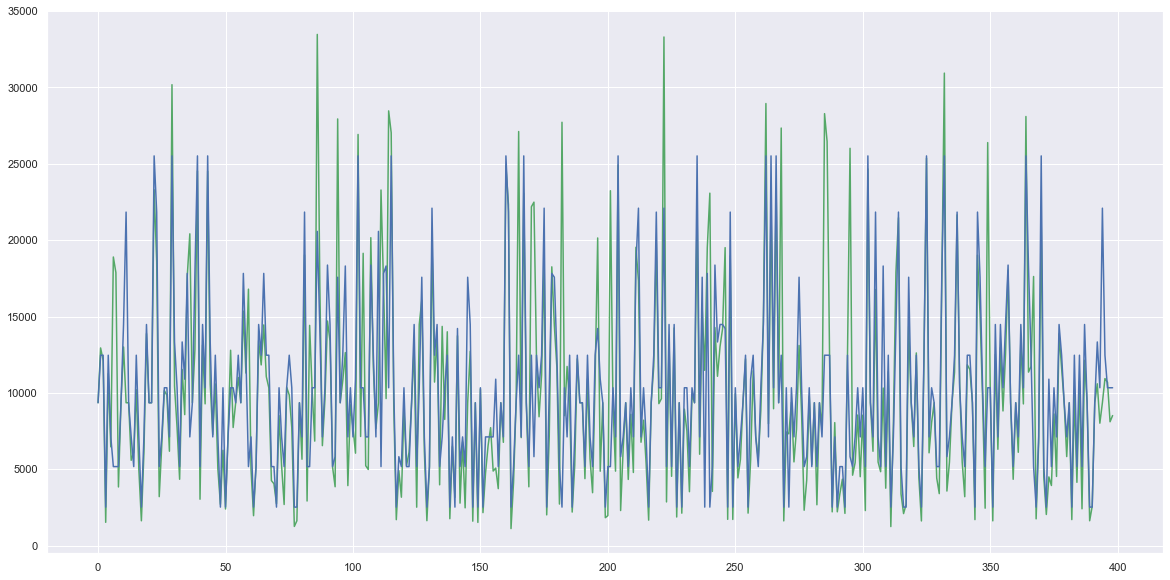

In [45]:
# plot graph for decision_tree_model
plt.plot(list(range(len(y_test))), y_test, color='g')
plt.plot(list(range(len(y_test))), y_pred, color='b')

In [46]:
# prediction using support_vector_regressor
y_pred = support_vector_regressor.predict(X_test)

predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions_df.head(10)

Actual     Predicted
1301   9361.32680  12626.086647
639   12949.15540  12207.997873
624   12129.61415  11979.225819
77     1532.46970   1805.655636
721   11264.54100  11192.440290
1255   6474.01300   6782.196836
1123  18903.49141   3394.102275
554   17878.90068   3138.669502
555    3847.67400   4192.016837
819    9361.32680  11498.584733

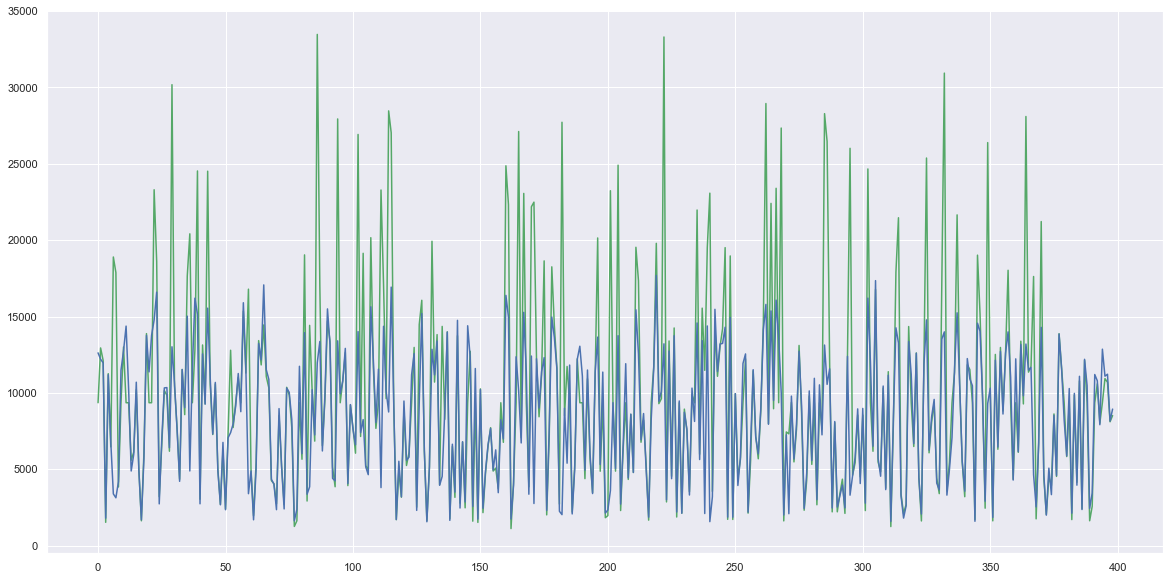

In [47]:
# plot graph for support_vector_regressor
plt.plot(list(range(len(y_test))), y_test, color='g')
plt.plot(list(range(len(y_test))), y_pred, color='b')

In [48]:
# prediction using random_forest_regressor
y_pred = random_forest_regressor.predict(X_test)

predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions_df.head(10)

Actual     Predicted
1301   9361.32680   9361.326800
639   12949.15540  13865.534840
624   12129.61415  13309.731395
77     1532.46970   2697.396243
721   11264.54100  13865.534840
1255   6474.01300   7145.055376
1123  18903.49141   4775.190489
554   17878.90068   4796.853220
555    3847.67400   6394.762494
819    9361.32680   9361.326800

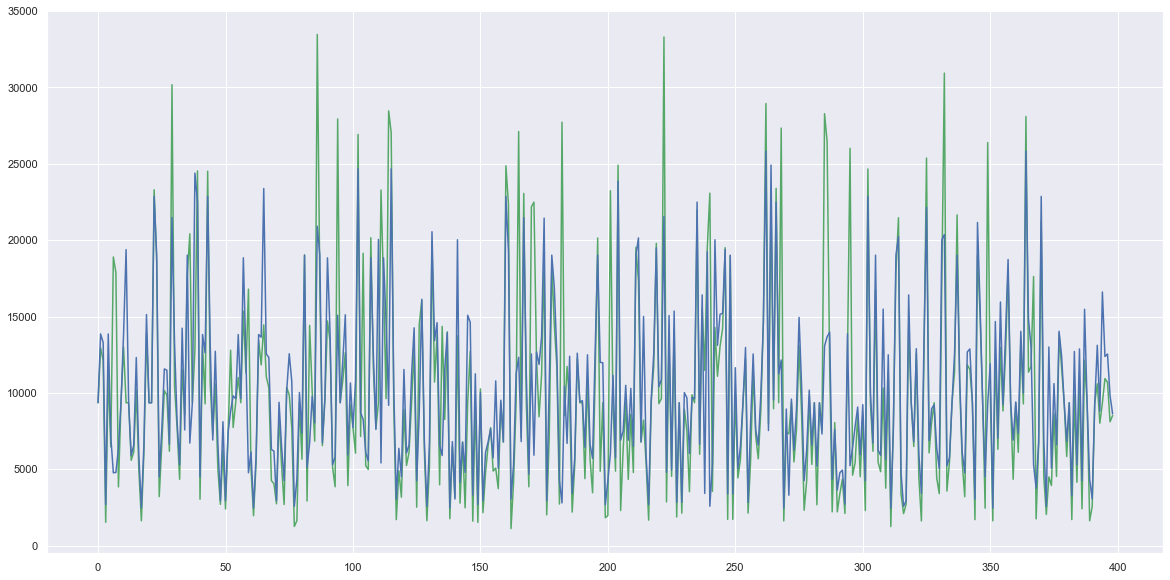

In [49]:
# plot graph for random_forest_regressor
plt.plot(list(range(len(y_test))), y_test, color='g')
plt.plot(list(range(len(y_test))), y_pred, color='b')

##### Decision Tree Model has given better Score for training and Test Dataset.

In [50]:
import pickle
filename = 'finalmodel.pkl'
with open(filename, 'wb') as fp:
    pickle.dump(decision_tree_model, fp)